In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Basic Linear Model

Text(0.5,1,'y = 4 + 3x with Gaussian Noise')

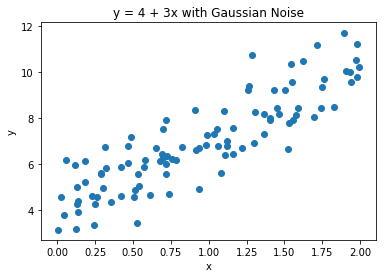

In [23]:
X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100,1)
plt.ylabel("y")
plt.xlabel("x")
plt.scatter(X,y)
plt.title('y = 4 + 3x with Gaussian Noise')

In [22]:
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print(theta_best)

[[ 4.2207821 ]
 [ 2.87629865]]


In [24]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.2207821],
       [ 9.9733794]])

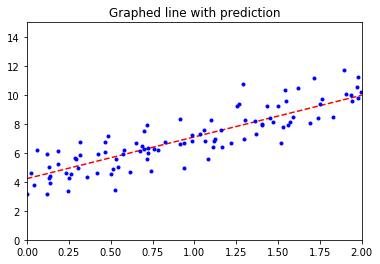

In [29]:
plt.plot(X_new, y_predict, "r--")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.title("Graphed line with prediction")
plt.show()

In [34]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)

print("Intecept: ", lin_reg.intercept_)
print("Coefficents: ", lin_reg.coef_)
print("X_new: ", X_new)
print("Prediciton on X_new: ", lin_reg.predict(X_new))

Intecept:  [ 4.09815992]
Coefficents:  [[ 3.01693041]]
X_new:  [[0]
 [2]]
Prediciton on X_new:  [[  4.09815992]
 [ 10.13202074]]


## Polynomial Model

Text(0.5,1,'.5 + x^2 + x with Gaussian Noise')

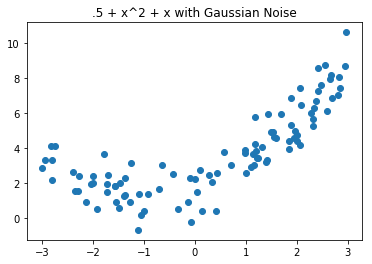

In [37]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

plt.scatter(X,y)
plt.title(".5 + x^2 + x with Gaussian Noise")


In [39]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

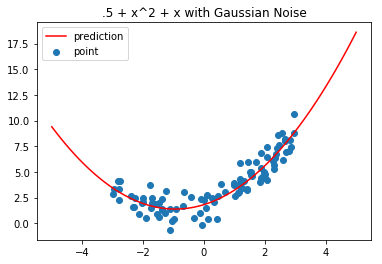

In [83]:
X_space=np.linspace(-5, 5, m).reshape(m, 1)
X_pred_poly = poly_features.transform(X_space)
y_pred = lin_reg.predict(X_pred_poly)
plt.scatter(X, y)
plt.plot(X_new, y_new, "red")
plt.title(".5 + x^2 + x with Gaussian Noise")
plt.legend(["prediction","point"])
plt.show()

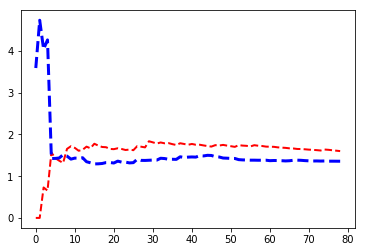

In [94]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
    plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b--", linewidth=3, label="val")
    
lin_reg = LinearRegression()
plot_learning_curves(lin_reg,X,y)

/Users/adacoope1/Library/Python/3.6/lib/python/site-packages/sklearn/linear_model/stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users/adacoope1/Library/Python/3.6/lib/python/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


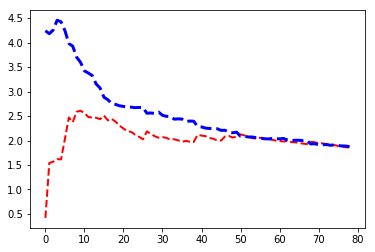

In [95]:
sgd_reg = SGDRegressor()
plot_learning_curves(sgd_reg,X,y)

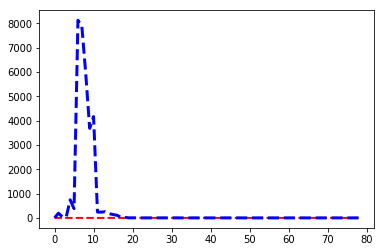

In [99]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression())
])

plot_learning_curves(polynomial_regression, X, y)

The Logistic Function
$$ \sigma(t) = \frac{1}{1 + e^{-t}}$$

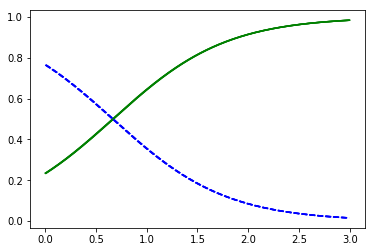

In [107]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
iris = datasets.load_iris()
X = iris["data"]
y = (iris["target"] == 2).astype(np.int)

log_reg = LogisticRegression()
log_reg.fit(X,y)

X_new = np.linspace(0, 3, 1000).reshape(-1, 4)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris-Virginia")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris-Virginia")

Linear Regression also gives the choice between $l1$ and $l2$ regularization. These refer to the regularization tern you add to your cost function. These regularization terms are only added to the models during training. And and removed when evaluating performence.

A Ridge (Tikhonov regulariation) Regression, adds the term 

$$\alpha\sum_{i=0}^{n}\theta^{2}_{i}$$

The hperparameter $\alpha$ controls how much you want to regularize the model. $\alpha = 0$ Results in a regualar linear regression while a high $\alpha$ makes the weights get closer and closer to zero.

The Lasso (Least Absolute Shrinkage and Selection Operator) Regresstion, adds the $l1$ regularization function which adds the following regularization terms.
$$\alpha\sum_{i=1}^{n}\mid\theta_{1}\mid$$
This regression tend to completely eliminate the least important features. 

Halfway inbtweeen both: The Elastic Net combines both cost functions to help address the difficulties with both methods 

$$J(\theta) = r\alpha\sum_{i=0}^{n}\theta^{2}_{i} + \frac{1 - r}{2}\alpha\sum_{i=1}^{n}\mid\theta_{1}\mid $$

Rule of Thumb: 
Use ridge as a default. If you susspect that only a few features are valuable, you should use Lasso or Elastic Net.

### Sofmax Regression (Multinomial Logistic Regression)

$$S_{k}(x) = (\theta^{k})^{t} x$$

In [112]:
from sklearn.linear_model import LogisticRegression

softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
softmax_reg.fit(X,y)



array([0])